## **To identify loan defaulter based on finanical and demographic factors**

In [1]:
# Capstone Project 1 - Finance - by Decision Tree ML algorithm

# Importing the initial required libraries

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets, linear_model


### Loading the Data


In [2]:
# Load the dataset

df = pd.read_csv("loan_py.csv")


### Step 1: Initlal EDA & Data Preparation

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Column             5000 non-null   object 
 1   loan_id            5000 non-null   object 
 2   loan_type          5000 non-null   object 
 3   loan_amount        5000 non-null   int64  
 4   interest_rate      5000 non-null   float64
 5   loan_term          5000 non-null   int64  
 6   employment_type    5000 non-null   object 
 7   income_level       5000 non-null   object 
 8   credit_score       5000 non-null   int64  
 9   gender             5000 non-null   object 
 10  marital_status     5000 non-null   object 
 11  education_level    5000 non-null   object 
 12  application_date   5000 non-null   object 
 13  approval_date      5000 non-null   object 
 14  disbursement_date  5000 non-null   object 
 15  due_date           5000 non-null   object 
 16  default_status     5000 

### Step 2: EDA & Data Preprocessing
* What values do you see?
* What distributions do you see?
* What relationships do you see?
* What relationships do you think might benefit the prediction problem?
* What ideas about the domain does the data spark?

In [4]:
df.columns

Index(['Column', 'loan_id', 'loan_type', 'loan_amount', 'interest_rate',
       'loan_term', 'employment_type', 'income_level', 'credit_score',
       'gender', 'marital_status', 'education_level', 'application_date',
       'approval_date', 'disbursement_date', 'due_date', 'default_status'],
      dtype='object')

In [5]:
# dispaly first 5 rows of the dataframe

df.head()

,Column,loan_id,loan_type,loan_amount,interest_rate,loan_term,employment_type,income_level,credit_score,gender,marital_status,education_level,application_date,approval_date,disbursement_date,due_date,default_status
0,CUST-00004912,LN00004170,Car Loan,16795,0.051852,15,Self-employed,Medium,833,Male,Single,Master,5/4/2018,23/4/2018,24/4/2018,14/8/2018,False
1,CUST-00004194,LN00002413,Personal Loan,1860,0.089296,56,Full-time,Medium,776,Female,Married,Bachelor,30/12/2022,31/12/2022,12/1/2023,5/4/2023,False
2,CUST-00003610,LN00000024,Personal Loan,77820,0.070470,51,Full-time,Low,697,Male,Divorced,High School,15/11/2019,18/11/2019,27/11/2019,24/2/2020,False
3,CUST-00001895,LN00001742,Car Loan,55886,0.062155,30,Full-time,Low,795,Female,Married,PhD,25/8/2021,8/9/2021,11/9/2021,25/2/2022,False
4,CUST-00003782,LN00003161,Home Loan,7265,0.070635,48,Part-time,Low,519,Female,Married,High School,2/9/2020,7/9/2020,11/9/2020,29/12/2020,False


In [6]:
df.tail()

,Column,loan_id,loan_type,loan_amount,interest_rate,loan_term,employment_type,income_level,credit_score,gender,marital_status,education_level,application_date,approval_date,disbursement_date,due_date,default_status
4995,CUST-00002992,LN00001103,Car Loan,37945,0.070087,57,Self-employed,High,511,Male,Married,PhD,23/1/2022,11/2/2022,14/2/2022,13/6/2022,False
4996,CUST-00004094,LN00001068,Personal Loan,48937,0.056405,50,Part-time,Medium,502,Male,Single,PhD,12/5/2018,17/5/2018,27/5/2018,20/11/2018,False
4997,CUST-00003903,LN00000745,Home Loan,7476,0.064212,58,Full-time,High,452,Female,Single,High School,14/10/2022,29/10/2022,6/11/2022,8/4/2023,True
4998,CUST-00002276,LN00003075,Car Loan,52756,0.094914,12,Self-employed,Medium,728,Male,Married,PhD,21/7/2018,6/8/2018,20/8/2018,21/1/2019,False
4999,CUST-00003583,LN00002491,Personal Loan,91101,0.083821,52,Self-employed,Low,586,Male,Single,Master,3/8/2021,4/8/2021,7/8/2021,25/12/2021,False


In [7]:
# Get an overall sense of the data shape with the mean/median, min, max, q1, q3 values
df.describe()

,loan_amount,interest_rate,loan_term,credit_score
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,49929.868000,0.079579,35.263000,573.206000
std,28721.249529,0.015230,13.792501,158.647522
min,1055.000000,0.031685,12.000000,300.000000
25%,24953.500000,0.069240,24.000000,435.000000
50%,49730.000000,0.079533,35.000000,571.000000
75%,75083.500000,0.089984,47.000000,712.000000
max,99989.000000,0.138894,59.000000,849.000000


In [8]:
# Look for cells with missing data (i.e. Null or NA)
df.isna().any().any()

#count the number of missing data for each feature
df_na = df.isna().sum()
df_na

#this will show only features that have nonzero missing values
#df_na[df_na!=0]

Column               0
loan_id              0
loan_type            0
loan_amount          0
interest_rate        0
loan_term            0
employment_type      0
income_level         0
credit_score         0
gender               0
marital_status       0
education_level      0
application_date     0
approval_date        0
disbursement_date    0
due_date             0
default_status       0
dtype: int64

In [9]:
# limit to categorical data using df.select_dtypes()
df_cat = df.select_dtypes(include=['object'])
df_cat.nunique()

Column               3121
loan_id              3159
loan_type               4
employment_type         3
income_level            3
gender                  2
marital_status          3
education_level         4
application_date     1711
approval_date        1732
disbursement_date    1723
due_date             1764
dtype: int64

In [10]:
# limit to numerical data using df.select_dtypes()
df_num = df.select_dtypes(include=['number'])
df_num.nunique()

loan_amount      4880
interest_rate    4999
loan_term          48
credit_score      550
dtype: int64

In [11]:
df.head()

,Column,loan_id,loan_type,loan_amount,interest_rate,loan_term,employment_type,income_level,credit_score,gender,marital_status,education_level,application_date,approval_date,disbursement_date,due_date,default_status
0,CUST-00004912,LN00004170,Car Loan,16795,0.051852,15,Self-employed,Medium,833,Male,Single,Master,5/4/2018,23/4/2018,24/4/2018,14/8/2018,False
1,CUST-00004194,LN00002413,Personal Loan,1860,0.089296,56,Full-time,Medium,776,Female,Married,Bachelor,30/12/2022,31/12/2022,12/1/2023,5/4/2023,False
2,CUST-00003610,LN00000024,Personal Loan,77820,0.070470,51,Full-time,Low,697,Male,Divorced,High School,15/11/2019,18/11/2019,27/11/2019,24/2/2020,False
3,CUST-00001895,LN00001742,Car Loan,55886,0.062155,30,Full-time,Low,795,Female,Married,PhD,25/8/2021,8/9/2021,11/9/2021,25/2/2022,False
4,CUST-00003782,LN00003161,Home Loan,7265,0.070635,48,Part-time,Low,519,Female,Married,High School,2/9/2020,7/9/2020,11/9/2020,29/12/2020,False


In [12]:
# mappng categorical variables to numerical variables for all columns except Column and loan_id.

mapping = {'Car Loan':1, 'Personal Loan':2, 'Home Loan':3,'Education Loan':4}
df['loan_type'] = df['loan_type'].map(mapping) 

mapping = {'Self-employed': 1, 'Full-time': 2, 'Part-time': 3}
df['employment_type'] = df['employment_type'].map(mapping)

mapping = {'Low': 1, 'Medium': 2, 'High': 3}
df['income_level'] = df['income_level'].map(mapping)

mapping = {'Male': 1, 'Female': 2}
df['gender'] = df['gender'].map(mapping)

mapping = {'Single': 1, 'Married': 2, 'Divorced': 3}
df['marital_status'] = df['marital_status'].map(mapping)

mapping = {'High School':1, 'Bachelor':2, 'Master':3,'PhD':4}
df['education_level'] = df['education_level'].map(mapping) 

In [13]:
df.head()

,Column,loan_id,loan_type,loan_amount,interest_rate,loan_term,employment_type,income_level,credit_score,gender,marital_status,education_level,application_date,approval_date,disbursement_date,due_date,default_status
0,CUST-00004912,LN00004170,1,16795,0.051852,15,1,2,833,1,1,3,5/4/2018,23/4/2018,24/4/2018,14/8/2018,False
1,CUST-00004194,LN00002413,2,1860,0.089296,56,2,2,776,2,2,2,30/12/2022,31/12/2022,12/1/2023,5/4/2023,False
2,CUST-00003610,LN00000024,2,77820,0.070470,51,2,1,697,1,3,1,15/11/2019,18/11/2019,27/11/2019,24/2/2020,False
3,CUST-00001895,LN00001742,1,55886,0.062155,30,2,1,795,2,2,4,25/8/2021,8/9/2021,11/9/2021,25/2/2022,False
4,CUST-00003782,LN00003161,3,7265,0.070635,48,3,1,519,2,2,1,2/9/2020,7/9/2020,11/9/2020,29/12/2020,False


In [14]:
#limit to numerical data using df.select_dtypes()
df_num = df.select_dtypes(include=['number'])
df_num.nunique()

loan_type             4
loan_amount        4880
interest_rate      4999
loan_term            48
employment_type       3
income_level          3
credit_score        550
gender                2
marital_status        3
education_level       4
dtype: int64

In [15]:
# Select only numerical variable columns
numerical_columns = df.select_dtypes(include=['number'])

# Compute the correlation matrix
cm = numerical_columns.corr()

print(cm)


                 loan_type  loan_amount  interest_rate  loan_term  \
loan_type         1.000000    -0.008058       0.002835  -0.019910   
loan_amount      -0.008058     1.000000      -0.017317   0.004763   
interest_rate     0.002835    -0.017317       1.000000  -0.014311   
loan_term        -0.019910     0.004763      -0.014311   1.000000   
employment_type  -0.025229     0.006711      -0.006055  -0.000954   
income_level     -0.004385    -0.016382       0.013421   0.002539   
credit_score      0.011207    -0.004780       0.016064  -0.023735   
gender            0.001904    -0.004453      -0.014609   0.005150   
marital_status    0.005931    -0.011412      -0.009994   0.003207   
education_level  -0.016367    -0.026095       0.013854  -0.021212   

                 employment_type  income_level  credit_score    gender  \
loan_type              -0.025229     -0.004385      0.011207  0.001904   
loan_amount             0.006711     -0.016382     -0.004780 -0.004453   
interest_rate     

In [16]:
# create new column 'default_coded' to convert False/True into 0/1 in column 'default_status'.

df['default_coded'] = df['default_status'].map({False: 0, True: 1})

In [17]:
df['default_coded'].value_counts()

default_coded
0    4001
1     999
Name: count, dtype: int64

In [18]:
df.head()

,Column,loan_id,loan_type,loan_amount,interest_rate,loan_term,employment_type,income_level,credit_score,gender,marital_status,education_level,application_date,approval_date,disbursement_date,due_date,default_status,default_coded
0,CUST-00004912,LN00004170,1,16795,0.051852,15,1,2,833,1,1,3,5/4/2018,23/4/2018,24/4/2018,14/8/2018,False,0
1,CUST-00004194,LN00002413,2,1860,0.089296,56,2,2,776,2,2,2,30/12/2022,31/12/2022,12/1/2023,5/4/2023,False,0
2,CUST-00003610,LN00000024,2,77820,0.070470,51,2,1,697,1,3,1,15/11/2019,18/11/2019,27/11/2019,24/2/2020,False,0
3,CUST-00001895,LN00001742,1,55886,0.062155,30,2,1,795,2,2,4,25/8/2021,8/9/2021,11/9/2021,25/2/2022,False,0
4,CUST-00003782,LN00003161,3,7265,0.070635,48,3,1,519,2,2,1,2/9/2020,7/9/2020,11/9/2020,29/12/2020,False,0


In [19]:
# Select only numerical variable columns

numerical_columns = df.select_dtypes(include=['number'])
df2 = df[numerical_columns.columns]
df2.head()

,loan_type,loan_amount,interest_rate,loan_term,employment_type,income_level,credit_score,gender,marital_status,education_level,default_coded
0,1,16795,0.051852,15,1,2,833,1,1,3,0
1,2,1860,0.089296,56,2,2,776,2,2,2,0
2,2,77820,0.070470,51,2,1,697,1,3,1,0
3,1,55886,0.062155,30,2,1,795,2,2,4,0
4,3,7265,0.070635,48,3,1,519,2,2,1,0


In [20]:
# As this is a classification exercise, we will check whether the target (dependent variable) is imbalanced
df2['default_coded'].value_counts()

default_coded
0    4001
1     999
Name: count, dtype: int64

In [21]:
# look at correlations in the numerical independent variables, as well as the dependent variable

df2.corr()

,loan_type,loan_amount,interest_rate,loan_term,employment_type,income_level,credit_score,gender,marital_status,education_level,default_coded
loan_type,1.000000,-0.008058,0.002835,-0.019910,-0.025229,-0.004385,0.011207,0.001904,0.005931,-0.016367,-0.039908
loan_amount,-0.008058,1.000000,-0.017317,0.004763,0.006711,-0.016382,-0.004780,-0.004453,-0.011412,-0.026095,-0.007309
interest_rate,0.002835,-0.017317,1.000000,-0.014311,-0.006055,0.013421,0.016064,-0.014609,-0.009994,0.013854,0.028963
loan_term,-0.019910,0.004763,-0.014311,1.000000,-0.000954,0.002539,-0.023735,0.005150,0.003207,-0.021212,-0.012358
employment_type,-0.025229,0.006711,-0.006055,-0.000954,1.000000,-0.027581,0.000217,0.005640,0.003896,-0.017437,-0.006486
income_level,-0.004385,-0.016382,0.013421,0.002539,-0.027581,1.000000,-0.020439,0.015783,-0.004550,-0.014252,-0.007003
credit_score,0.011207,-0.004780,0.016064,-0.023735,0.000217,-0.020439,1.000000,-0.026743,-0.002836,0.028946,-0.007346
gender,0.001904,-0.004453,-0.014609,0.005150,0.005640,0.015783,-0.026743,1.000000,0.002395,-0.025118,-0.039129
marital_status,0.005931,-0.011412,-0.009994,0.003207,0.003896,-0.004550,-0.002836,0.002395,1.000000,0.002095,-0.011046
education_level,-0.016367,-0.026095,0.013854,-0.021212,-0.017437,-0.014252,0.028946,-0.025118,0.002095,1.000000,0.016094


In [22]:
# As this is a classification exercise, we will check whether the target (dependent variable) is imbalanced
df2['default_coded'].value_counts()

default_coded
0    4001
1     999
Name: count, dtype: int64

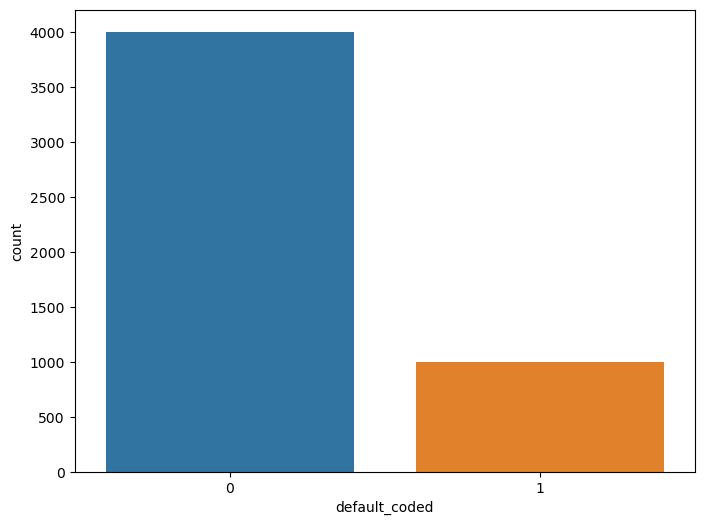

In [23]:
# To visualize how well balanced the target (dependent variable) is

plt.rcParams['figure.figsize']=(8,6)
_ = sns.countplot(x=df2['default_coded'])

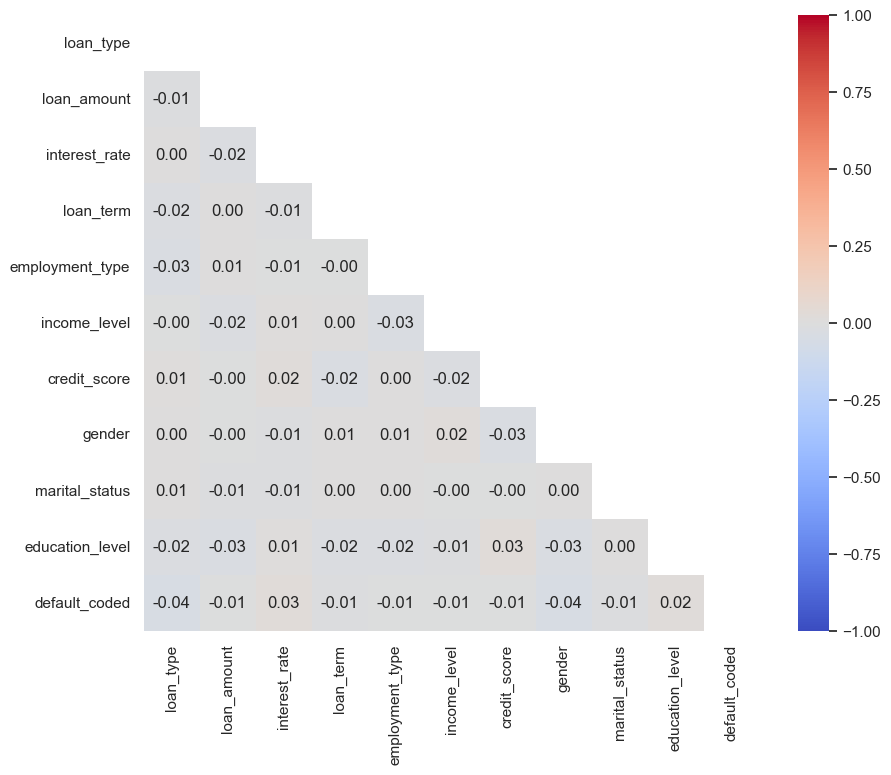

In [24]:
# correlation matrix heatmap visualization (independent and dependent variables)

sns.set(style="white")

# Generate a mask for the upper triangle
matrix = np.triu(df2.corr())

# Set up the matplotlib figure to control size of heatmap
fig, ax = plt.subplots(figsize=(10,8))

# Plot the heatmap
_ = sns.heatmap(df2.corr(), mask=matrix, annot=True, annot_kws={"size": 12}, square=True, 
                cmap='coolwarm' , vmin=-1, vmax=1, fmt='.2f')  # annot=True display corr label



### Step 3: Preparing the data for training and testing

1) Divide independent and dependent variable into two separate variables.

2) Split the data into training and testing datasets.

In [25]:
# Define X and y as the predictors (independent X) and target variables (dependent y) where:

#X contains all other columns except for default_coded
#y contains only default_coded column

X = df2.drop(['default_coded'], axis=1)   # input (independent variable)
y = df2['default_coded']                  # output (dependent variable)

In [26]:
# 2) Splitting our data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X ,y, 
                                                    test_size = 0.2, 
                                                    shuffle=True, 
                                                    stratify=y,
                                                    random_state=42)

### Step 4: Training the model

In [27]:
# apply Hyperparameters Tuning technique to obtain optimal paramaters before training the machine learning model

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt


# Define the hyperparameter grid
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Create a decision tree classifier
DT_model = DecisionTreeClassifier(random_state=0)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=DT_model, param_grid=param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)


Best Parameters: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best Score: 0.5133133811411051


In [28]:
# Best hyperparameters obtained from grid search
best_params = {'max_depth': 20, 'min_samples_split': 10, 'min_samples_leaf': 2, 'criterion': 'entropy'}

# Create a decision tree classifier with the best hyperparameters
best_DT_model = DecisionTreeClassifier(**best_params)

# Fit the decision tree classifier to the training data
best_DT_model.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=2,
                       min_samples_split=10)

### Step 5: Testing the model

In [29]:
# testing the X_test dataset

y_pred = best_DT_model.predict(X_test)

compare_df2 = pd.DataFrame({"Desired Output (Actuals)": y_test, 
                            "Predicted Output": y_pred})

# add a 'Match' column to check the matching condition

compare_df2['Match'] = compare_df2['Desired Output (Actuals)'] == compare_df2['Predicted Output']

compare_df2

,Desired Output (Actuals),Predicted Output,Match
4345,0,0,True
1563,0,0,True
3228,0,0,True
1341,0,0,True
4857,0,0,True
...,...,...,...
2522,0,0,True
1917,0,0,True
1946,0,0,True
2018,0,1,False


### Step 6: Evaluate the model

Confusion Matrix:
[[702  98]
 [174  26]]


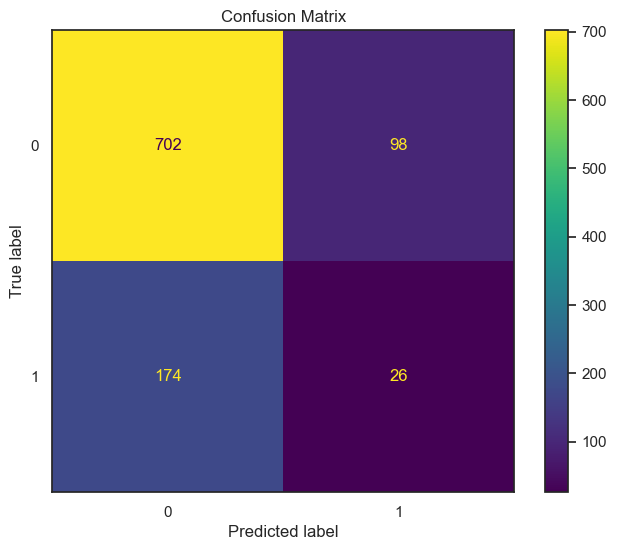

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       800
           1       0.21      0.13      0.16       200

    accuracy                           0.73      1000
   macro avg       0.51      0.50      0.50      1000
weighted avg       0.68      0.73      0.70      1000



In [30]:
# Predict the loan status for x_test values and save the results as predicted
# Create a confusion matrix of the model
# Print the performance metrics of the model

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score

y_pred = best_DT_model.predict(X_test)

print("Confusion Matrix:")
conf = confusion_matrix(y_test, y_pred)
print(conf)

# Create a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=conf, display_labels=best_DT_model.classes_)

# Plot the confusion matrix
disp.plot(cmap='viridis', values_format='.0f')
plt.title("Confusion Matrix")
plt.show()

#'plot_confusion_matrix' not avail in skLearn library! version issue, cannot be used as of now.
#plot_confusion_matrix(DT_model, x_test, y_test)
#plt.show()

print(classification_report(y_test, y_pred))

In [31]:
# list out the result of Accuracy, Precision and Recall

test_acc = best_DT_model.score(X_test, y_test)
print("Accuracy  = {:.2f}".format(test_acc))

# Precision
test_pre = precision_score(y_test, y_pred, average=None)
print("Precision = {}".format(test_pre))

# Recall
test_rec  = recall_score(y_test, y_pred, average=None)
print("Recall    = {}".format(test_rec))

Accuracy  = 0.73
Precision = [0.80136986 0.20967742]
Recall    = [0.8775 0.13  ]


In [32]:
#check for overfitting on both training and testing datasets

from sklearn.metrics import accuracy_score

# Make predictions on the training and testing sets
y_train_pred = best_DT_model.predict(X_train)
y_test_pred = best_DT_model.predict(X_test)

# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Check for overfitting
if train_accuracy > test_accuracy:
    print("Model may be overfitting.")
else:
    print("Model generalizes well.")

Training Accuracy: 0.8805
Testing Accuracy: 0.728
Model may be overfitting.


In [33]:
# List out the first twenty or less missed predictions

compared_bool = compare_df2['Desired Output (Actuals)'] != compare_df2['Predicted Output']
df2_missed = compare_df2[compared_bool]
df2_missed[:20]

,Desired Output (Actuals),Predicted Output,Match
4540,0,1,False
638,0,1,False
349,0,1,False
4287,0,1,False
4402,1,0,False
2970,1,0,False
3444,0,1,False
4156,0,1,False
1294,1,0,False
3707,0,1,False


### Step 7: My own prediction using one of the observations from X_test

In [35]:
my_features = X_test.iloc[np.random.randint(0, len(X_test))]
own_pred = best_DT_model.predict(my_features.to_numpy().reshape(1, -1))

default_names = ["Non-defaulter(0)", "Defaulter(1)"]  # 0 = non-defaulter, 1 = defaulter

print("My prediction is a {}.".format(default_names[own_pred[0]]))
print("This was the input data:")
print(my_features)

My prediction is a Non-defaulter(0).
This was the input data:
loan_type              2.000000
loan_amount        38904.000000
interest_rate          0.084459
loan_term             53.000000
employment_type        1.000000
income_level           2.000000
credit_score         746.000000
gender                 2.000000
marital_status         1.000000
education_level        2.000000
Name: 1467, dtype: float64


In [36]:
# validate own prediction result against the dataset

print(df2[df2['loan_amount'] == 38904])

      loan_type  loan_amount  interest_rate  loan_term  employment_type  \
1467          2        38904       0.084459         53                1   

      income_level  credit_score  gender  marital_status  education_level  \
1467             2           746       2               1                2   

      default_coded  
1467              0  
